# THIS IS EXAMPLE OF MULTILINEAR REGRESSION -MORE THAN ONE INDEPENDENT VARIABLE (X)-.R&D,ADMINISTRATION,MARKETTING SPEED,STATE AND ONE DEPENDENT VARAIBLE(Y)->PROFIT

In [1]:
###IMPORT ALL IBRARIES
import numpy as np
import pandas as pd
import os

In [1]:
#### IT TELLS THE ABSOLUTE PATH OF WORKING DIRECTORY PROCESS
import os
os.getcwd()

'C:\\Users\\wel'

In [3]:
#### READ CSV FILE
data=pd.read_csv('50_Startups.csv')
df=pd.DataFrame(data)

# COLLECT DATA

In [4]:
### TOP 5
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
### BOTTOM 5
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
## STATISCAL INFORMATION
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
## INFORMATION OF DATAFRAME 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
### STATISTICAL ANALYSIS OF OBJECT TYPE DATA
df.describe(include=['object'])

,State
count,50
unique,3
top,California
freq,17


In [9]:
#### CHECK NULL VALUES
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
#### IT GIVE TOTAL NUMBER OF VALUES 
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

# DATA WRANGLING

In [11]:
### CONVERT INTO BINARY
df1=pd.get_dummies(df,['State'])
df=df1.copy()

In [12]:
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [13]:
#### VISUALIZATION
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'R&D versus PROFIT')

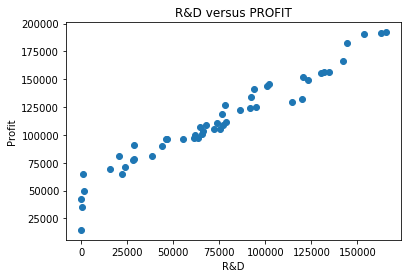

In [14]:
plt.scatter(data['R&D Spend'],df.Profit,marker='o')
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D versus PROFIT')

Text(0.5, 1.0, 'Administration versus PROFIT')

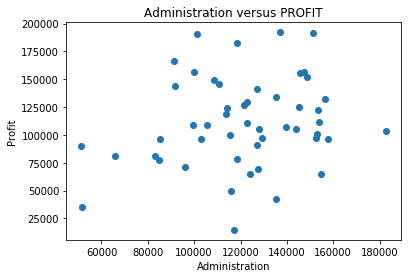

In [15]:
plt.scatter(data['Administration'],df.Profit,marker='o')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration versus PROFIT')

Text(0.5, 1.0, 'Marketing Spendversus PROFIT')

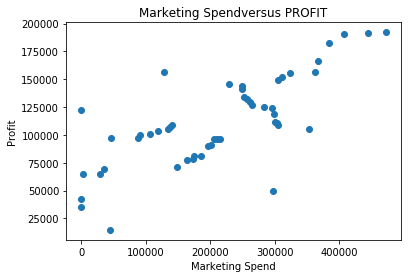

In [16]:
plt.scatter(data['Marketing Spend' ],df.Profit,marker='o')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spendversus PROFIT')

Text(0.5, 1.0, 'State versus PROFIT')

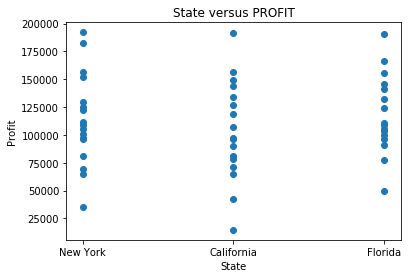

In [17]:
plt.scatter(data['State' ],df.Profit,marker='o')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State versus PROFIT')

# IMPLEMENTATION OF ALGORITHM USKING SK LEARN

In [18]:
#### IMPORT LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [19]:
X=df.drop(['Profit'],axis=1)

In [20]:
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [21]:
Y=df.Profit

In [22]:
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [23]:
### SPLIT OUR DATASET INTO TRAIN AND TEST TO TRAIN OUR MODEL
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [24]:
X_train

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
12,93863.75,127320.38,249839.44,0,1,0
4,142107.34,91391.77,366168.42,0,1,0
37,44069.95,51283.14,197029.42,1,0,0
8,120542.52,148718.95,311613.29,0,0,1
3,144372.41,118671.85,383199.62,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
41,27892.92,84710.77,164470.71,0,1,0
46,1315.46,115816.21,297114.46,0,1,0
47,0.00,135426.92,0.00,1,0,0
15,114523.61,122616.84,261776.23,0,0,1


In [25]:
Y_train

12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
6     156122.51
41     77798.83
46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
24    108552.04
34     96712.80
31     97483.56
0     192261.83
44     65200.33
27    105008.31
33     96778.92
5     156991.12
29    101004.64
11    144259.40
36     90708.19
1     191792.06
21    111313.02
2     191050.39
43     69758.98
35     96479.51
23    108733.99
40     78239.91
10    146121.95
22    110352.25
18    124266.90
49     14681.40
20    118474.03
7     155752.60
42     71498.49
14    132602.65
28    103282.38
38     81229.06
Name: Profit, dtype: float64

In [26]:
X_test

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
13,91992.39,135495.07,252664.93,1,0,0
39,38558.51,82982.09,174999.30,1,0,0
30,61994.48,115641.28,91131.24,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
17,94657.16,145077.58,282574.31,0,0,1
48,542.05,51743.15,0.00,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
25,64664.71,139553.16,137962.62,1,0,0
32,63408.86,129219.61,46085.25,1,0,0
19,86419.70,153514.11,0.00,0,0,1


In [27]:
Y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

In [28]:
###WE CALL OUR ESTIMATOR INSTANCE 'model'
model=LinearRegression()

In [29]:
### PASS OUR TRAINING DATASET TO THE FIT METHOD
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
##WE USE OUR TEST SET TO RUN PREDICTIONS
y_predict=model.predict(X_test)

In [31]:
y_predict

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505,  50912.41741878, 109741.35032702, 100643.24281647,
        97599.27574593, 113097.42524431])

In [32]:
model.score(X_test,Y_test)

0.8987266414329448

In [33]:
model.intercept_

54343.299848979506

In [34]:
model.coef_

array([ 8.05630064e-01, -6.87878823e-02,  2.98554429e-02, -3.15260255e+02,
        6.23532751e+02, -3.08272495e+02])

# DATA VISUALISATION AFTER TRAINING DATA 

Text(0, 0.5, 'Profit')

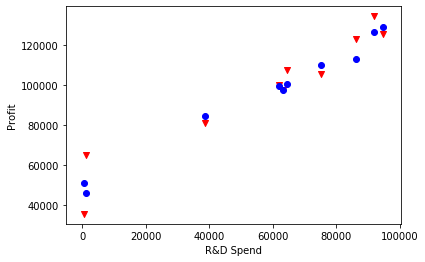

In [35]:
plt.scatter(X_test['R&D Spend'],Y_test,marker='v',color='r')
plt.scatter(X_test['R&D Spend'],y_predict,marker='o',color='b')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

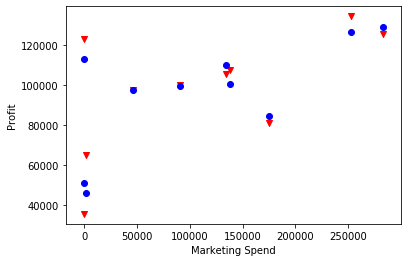

In [36]:
plt.scatter(X_test['Marketing Spend'],Y_test,marker='v',color='r')
plt.scatter(X_test['Marketing Spend'],y_predict,marker='o',color='b')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

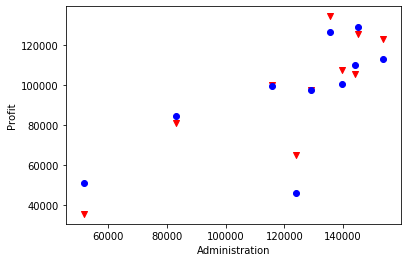

In [37]:
plt.scatter(X_test['Administration'],Y_test,marker='v',color='r')
plt.scatter(X_test['Administration'],y_predict,marker='o',color='b')
plt.xlabel('Administration')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

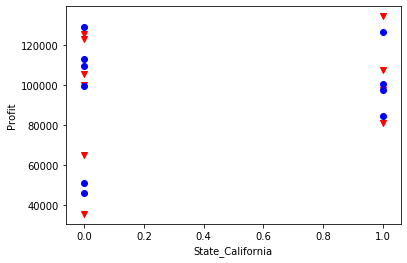

In [38]:
plt.scatter(X_test['State_California'],Y_test,marker='v',color='r')
plt.scatter(X_test['State_California'],y_predict,marker='o',color='b')
plt.xlabel('State_California')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

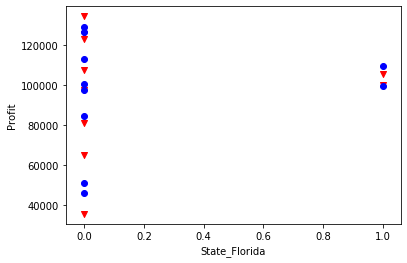

In [39]:
plt.scatter(X_test['State_Florida'],Y_test,marker='v',color='r')
plt.scatter(X_test['State_Florida'],y_predict,marker='o',color='b')
plt.xlabel('State_Florida')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

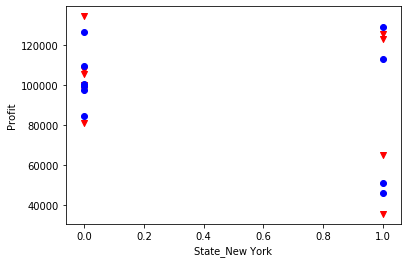

In [40]:
plt.scatter(X_test['State_New York'],Y_test,marker='v',color='r')
plt.scatter(X_test['State_New York'],y_predict,marker='o',color='b')
plt.xlabel('State_New York')
plt.ylabel('Profit')